In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


### Importing the MNIST fashion dataset

##### This data set contains 70,000 28x28px greyscales pictures of individual pieces of clothing, in 10 different categories

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

##### Setting up the trainging an testing data  60,000 images are used as the training data, and 10,000 images are used as the testing data

##### Adding lables to the classes, since they weren't included in the dataset

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##### Exploring the data to find there are 60,000 (28x28) training images and lables, and 10,000 testing images and labels.

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

##### The data must be preprocessed before training the network. By plotting the first image, you can find out where the pixel values fall.  This one is between 0 and 255

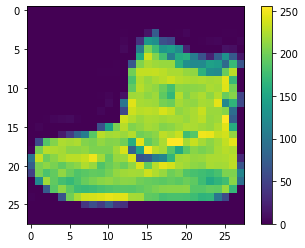

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

##### You need to scale these values (both training and testing) to between 0 and 1, you do this by dividing both sets by 255

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

##### Verify that the data is in the correct format and algining properly with their class names, display the first 25 images of the training dataset 

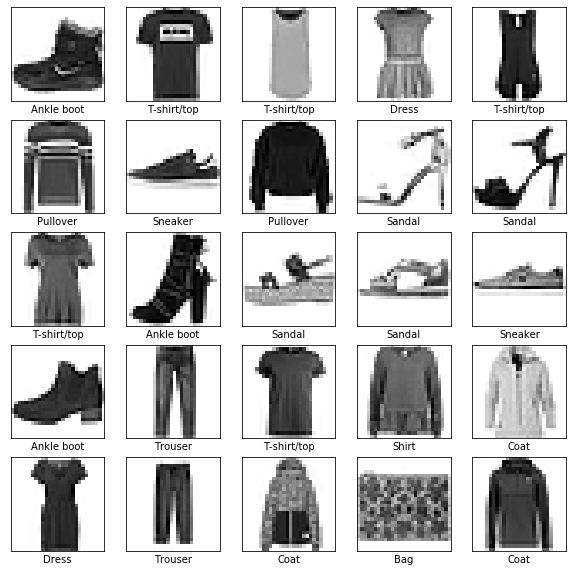

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### Build the model
First you have to set up the layers, and then compile the model

##### Setting up the layers
Flatting the layer turns it from a 2-dimensional array (28x28pixels) to a 1-dimensional array of 784 pixels
The first dense layer has 128 nodes
The second dense layer has an array of 10 probability scores that sum to 1. This helps perdict if your image is in one of the 10 classes in your dataset

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

##### Compiling the model

Loss function measures how accurate the model is during training. 
Optimizer this upates the model based on the data it sees and its loss function.
Metrics is used to monitor the training and testing steps. The accuracy metric, measures the fraction on the images that are correctly classified.

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##### Train the model

Give the model your training data, and it learns to match images with lables. 

In [15]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4973 - accuracy: 0.8259
Epoch 2/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3821 - accuracy: 0.8625
Epoch 3/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3399 - accuracy: 0.8774
Epoch 4/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3159 - accuracy: 0.8847
Epoch 5/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2990 - accuracy: 0.8892
Epoch 6/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2820 - accuracy: 0.8956
Epoch 7/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2737 - accuracy: 0.8987
Epoch 8/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2592 - accuracy: 0.9043
Epoch 9/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2524 - accuracy: 0.9065
Epoch 10/10
60

##### Evaluate accuracy
Comparing how the training model matched up to the test data 

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2150 - accuracy: 0.8799

Test accuracy: 0.8799


The accuracy on the test data is not as accurate as the training data.  This is called Overfitting, when a model does worse with new data inputs than it did with the training data.

##### Make predictions
Now that the model is trained you can use it to make some predictions about your images.

In [17]:
predictions = model.predict(test_images)

In [18]:
predictions[0]


array([5.0938261e-06, 5.4604589e-12, 8.1479913e-11, 5.8737581e-12,
       1.2914033e-09, 2.1965252e-03, 1.8172982e-09, 2.1125206e-03,
       1.2789101e-08, 9.9568594e-01], dtype=float32)

This array of numbers, is the model's "confidence" in which the images matches one of the categories

In [19]:
np.argmax(predictions[0])

9

The model predicted that the image it had most confidence in it matching was the class_name[9]

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

##### Looking at the [0] image, and the prediction precentage. 

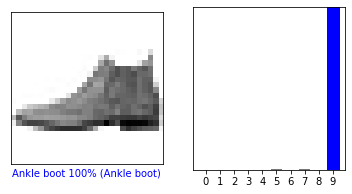

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

##### Looking at the [12] image, and the prediction precentage. 

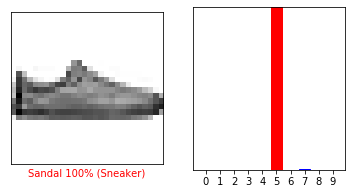

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

##### My model thought it was asandal, but it is actually a sneaker.

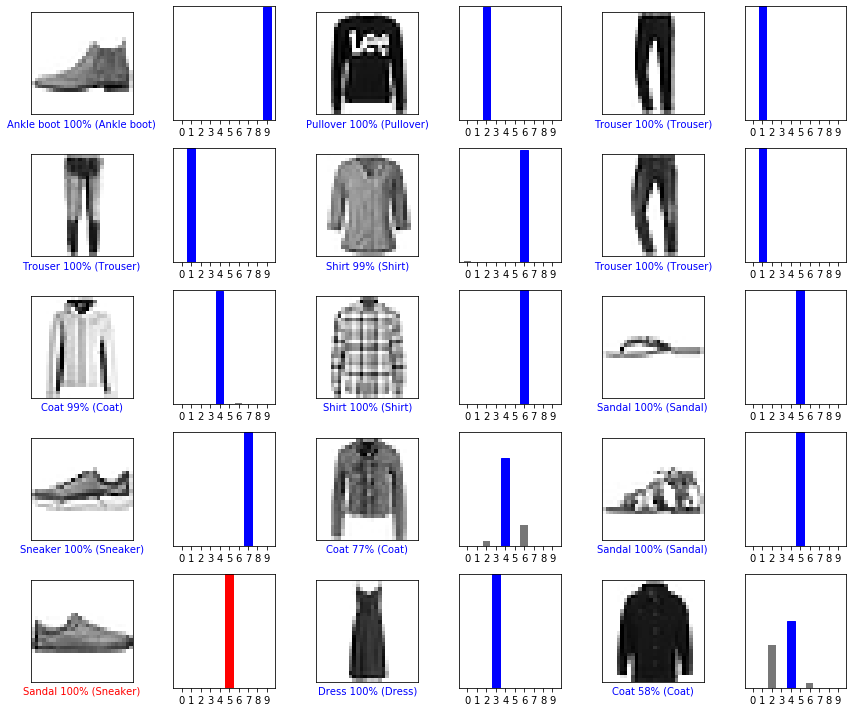

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

##### Testing a bunch of images got good results, but it still thinks that sneaker is a bag 

####  Finally, use the trained model to make a prediction about a single image.

In [24]:
img = test_images[1]

print(img.shape)

(28, 28)


In [25]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.8711663e-06 1.3941502e-10 9.9899298e-01 2.5404853e-08 2.2063493e-04
  8.5900675e-17 7.8344200e-04 2.0934397e-20 2.5571772e-10 2.1137470e-15]]


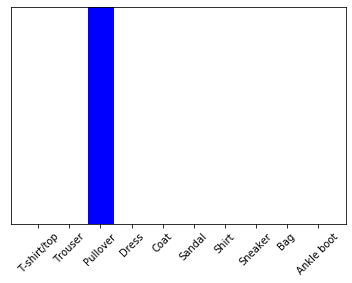

In [27]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [28]:
np.argmax(predictions_single[0])

2